# Correlations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qsim.utils.quantum_guidelines import global_setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

global_setup()

%matplotlib inline

Setup methods loaded


# Paper plots

In [3]:
from experiments.repeated_cnots.correlations import (
    PhaseFlipsCorrelationSFBNoIdle,
    PhaseFlipsCorrelationTransitionMatricesNoIdle,
)

nbar = 4
k2a = 3
k1 = 0
k1a = 0
k2 = 1
gate_time = 1 / k2a
k2a_l = [i for i in range(1, 10)] + [20]


corrSFBnI = PhaseFlipsCorrelationSFBNoIdle(
    nbar=nbar,
    k1=k1,
    k2=k2,
    gate_time=gate_time,
    k2a=k2a,
    k1a=k1a,
    N=5,
    N_ancilla=4,
    # k2a_l = range(1, 7),
    k2a_l=k2a_l,
)

corrSFBTM = PhaseFlipsCorrelationTransitionMatricesNoIdle(
    nbar=nbar,
    k1=k1,
    k2=k2,
    gate_time=gate_time,
    k2a=k2a,
    k1a=k1a,
    N=3,
    N_ancilla=3,
    # k2a_l = range(1, 7),
    k2a_l=k2a_l,
)

In [4]:
from experiments.repeated_cnots.correlations import (
    get_majority_vote_uncorrelated,
    get_majority_vote_correlated,
)


In [ ]:
corrSFBTM.reinit(nbar=4, N=6, N_ancilla=6)
corrSFBTM.get_data()
corrSFBTM.data

# Build df

In [6]:
%%time
k2a_l = range(1, 12, 2)
nbar_l = range(4, 11, 2)

exps = [
    corrSFBnI,
    corrSFBTM,
]

res = []

for i, exp in enumerate(exps):
    for nbar in nbar_l:
        for k2a in k2a_l:
            exp.reinit(k2a=k2a, nbar=nbar)
            try:
                exp.get_data()
                maj_vote_corr = get_majority_vote_correlated(
                    data=exp.data, index=k2a
                )
                maj_vote_uncorr = get_majority_vote_uncorrelated(
                    data=exp.data, index=k2a
                )
                res.append(
                    {
                        'Exp': type(exp).__name__,
                        'k2a': k2a,
                        'nbar': nbar,
                        'Majority vote Correlated': maj_vote_corr,
                        'Majority vote Uncorrelated': maj_vote_uncorr,
                        'N_data': exp.N,
                        'N_ancilla': exp.N_ancilla,
                    }
                )
            except:
                pass

CPU times: user 711 µs, sys: 563 µs, total: 1.27 ms
Wall time: 868 µs


In [7]:
res = []
for i, exp in enumerate(exps):
    for nbar in nbar_l:
        for k2a in k2a_l:
            res.append(
                {
                    'Exp': type(exp).__name__,
                    'k2a': k2a,
                    'nbar': nbar,
                    'correlated': 1,
                    'maj_vote': 0,
                    'name': 'Correlated',
                }
            )
            res.append(
                {
                    'Exp': type(exp).__name__,
                    'k2a': k2a,
                    'nbar': nbar,
                    'correlated': 0,
                    'maj_vote': 0,
                    'name': 'Uncorrelated',
                }
            )

In [ ]:
res

In [ ]:
df = pd.DataFrame(res)
df['Majority vote Correlated'] = df['Majority vote Correlated'].apply(
    lambda x: np.real(x)
)
df['Majority vote Uncorrelated'] = df['Majority vote Uncorrelated'].apply(
    lambda x: np.real(x)
)
df

In [13]:
df

,Exp,k2a,nbar,correlated,maj_vote,name,N_data,N_ancilla
0,PhaseFlipsCorrelationSFBNoIdle,1,4,1,0,Correlated,2,2
1,PhaseFlipsCorrelationSFBNoIdle,1,4,0,0,Uncorrelated,2,2
2,PhaseFlipsCorrelationSFBNoIdle,3,4,1,0,Correlated,2,2
3,PhaseFlipsCorrelationSFBNoIdle,3,4,0,0,Uncorrelated,2,2
4,PhaseFlipsCorrelationSFBNoIdle,5,4,1,0,Correlated,2,2
...,...,...,...,...,...,...,...,...
91,PhaseFlipsCorrelationTransitionMatricesNoIdle,7,10,0,0,Uncorrelated,7,7
92,PhaseFlipsCorrelationTransitionMatricesNoIdle,9,10,1,0,Correlated,7,7
93,PhaseFlipsCorrelationTransitionMatricesNoIdle,9,10,0,0,Uncorrelated,7,7
94,PhaseFlipsCorrelationTransitionMatricesNoIdle,11,10,1,0,Correlated,7,7


In [48]:
exp_names = {type(exp).__name__: exp for exp in exps}
df['N_data'] = df.apply(lambda x: exp_names[x['Exp']].N, axis=1)
df['N_ancilla'] = df.apply(lambda x: exp_names[x['Exp']].N_ancilla, axis=1)

In [22]:
from typing import Tuple


def split_d(d: dict) -> Tuple:
    v_corr = d['Majority vote Correlated']
    v_uncorr = d['Majority vote Uncorrelated']
    for k in ['Majority vote Correlated', 'Majority vote Uncorrelated']:
        d.pop(k)
    d_copy = d.copy()
    d.update({'correlated': 1, 'maj_vote': v_corr, 'name': 'Correlated'})
    d_copy.update(
        {'correlated': 0, 'maj_vote': v_uncorr, 'name': 'Uncorrelated'}
    )
    return d, d_copy



In [ ]:
res_updated = []
for d in df.to_dict('records'):
    res_updated += list(split_d(d))

In [ ]:
df_updated = pd.DataFrame(res_updated)
df_updated
df_updated[df_updated.Exp == 'PhaseFlipsCorrelationSFBNoIdle']

In [ ]:
nbar_l = set(df_updated.nbar)

In [ ]:
df['$\overline{n}$'] = df.apply(lambda x: x['nbar'], axis=1)

In [ ]:
df['Method'] = df.apply(
    lambda x: 'Full $\\hat{\\rho}$'
    if x['Exp'] == 'PhaseFlipsCorrelationSFBNoIdle'
    else 'Diagonal $\\hat{\\rho}$',
    axis=1,
)

## save and load df

In [ ]:
df_updated.keys()

Index(['Exp', 'k2a', 'nbar', 'N_data', 'N_ancilla', 'correlated', 'maj_vote',
       'name'],
      dtype='object')

In [ ]:
np.save('correlation_results.npy', df_updated.to_numpy())

In [10]:
df = pd.DataFrame(
    np.load('correlation_results.npy', allow_pickle=True),
    columns=[
        'Exp',
        'k2a',
        'nbar',
        'N_data',
        'N_ancilla',
        'correlated',
        'maj_vote',
        'name',
    ],
)
df

,Exp,k2a,nbar,N_data,N_ancilla,correlated,maj_vote,name
0,PhaseFlipsCorrelationSFBNoIdle,1,4,5,4,1,0.04315,Correlated
1,PhaseFlipsCorrelationSFBNoIdle,1,4,5,4,0,0.04315,Uncorrelated
2,PhaseFlipsCorrelationSFBNoIdle,3,4,5,4,1,0.0225,Correlated
3,PhaseFlipsCorrelationSFBNoIdle,3,4,5,4,0,0.011817,Uncorrelated
4,PhaseFlipsCorrelationSFBNoIdle,5,4,5,4,1,0.012293,Correlated
...,...,...,...,...,...,...,...,...
91,PhaseFlipsCorrelationSFBNoIdle,11,6,5,4,0,0.000036,Uncorrelated
92,PhaseFlipsCorrelationSFBNoIdle,11,8,5,4,1,0.000114,Correlated
93,PhaseFlipsCorrelationSFBNoIdle,11,8,5,4,0,0.000005,Uncorrelated
94,PhaseFlipsCorrelationSFBNoIdle,11,10,5,4,1,0.000029,Correlated


In [11]:
df['$|\\alpha|^2$'] = df['nbar']
df['Method'] = df.apply(
    lambda x: 'Full $\\hat{\\rho}$'
    if x['Exp'] == 'PhaseFlipsCorrelationSFBNoIdle'
    else 'Diagonal $\\hat{\\rho}$',
    axis=1,
)
df['Correlation Model'] = df.apply(
    lambda x: 'Quantum'
    if x['Exp'] == 'PhaseFlipsCorrelationSFBNoIdle'
    else 'Classical',
    axis=1,
)

In [12]:
df

,Exp,k2a,nbar,N_data,N_ancilla,correlated,maj_vote,name,$|\alpha|^2$,Method,Correlation Model
0,PhaseFlipsCorrelationSFBNoIdle,1,4,5,4,1,0.04315,Correlated,4,Full $\hat{\rho}$,Quantum
1,PhaseFlipsCorrelationSFBNoIdle,1,4,5,4,0,0.04315,Uncorrelated,4,Full $\hat{\rho}$,Quantum
2,PhaseFlipsCorrelationSFBNoIdle,3,4,5,4,1,0.0225,Correlated,4,Full $\hat{\rho}$,Quantum
3,PhaseFlipsCorrelationSFBNoIdle,3,4,5,4,0,0.011817,Uncorrelated,4,Full $\hat{\rho}$,Quantum
4,PhaseFlipsCorrelationSFBNoIdle,5,4,5,4,1,0.012293,Correlated,4,Full $\hat{\rho}$,Quantum
...,...,...,...,...,...,...,...,...,...,...,...
91,PhaseFlipsCorrelationSFBNoIdle,11,6,5,4,0,0.000036,Uncorrelated,6,Full $\hat{\rho}$,Quantum
92,PhaseFlipsCorrelationSFBNoIdle,11,8,5,4,1,0.000114,Correlated,8,Full $\hat{\rho}$,Quantum
93,PhaseFlipsCorrelationSFBNoIdle,11,8,5,4,0,0.000005,Uncorrelated,8,Full $\hat{\rho}$,Quantum
94,PhaseFlipsCorrelationSFBNoIdle,11,10,5,4,1,0.000029,Correlated,10,Full $\hat{\rho}$,Quantum


/Users/fleregen/.pyenv/versions/3.8.7/envs/paper_high_perf/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/3s/nd608nl93j95yq_q9rfr02hc00m8zh/T/ipykernel_56893/2280885013.py:72: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.2)


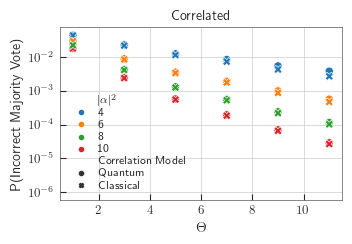

In [38]:
df_updated = df.sort_values('Exp')
nbar_l = set(df_updated.nbar)
palette = sns.color_palette()[: len(nbar_l)]
df_to_plot = df_updated
df_to_plot = df_updated[
    (
        df_updated['Exp'].isin(
            [
                'PhaseFlipsCorrelationTransitionMatricesNoIdle',
                'PhaseFlipsCorrelationSFBNoIdle',
            ]
        )
    )
]

s=35
s2=20
g = sns.relplot(
    data=df_to_plot[df_to_plot['correlated'] == 1],
    # data=df_to_plot,
    x='k2a',
    y='maj_vote',
    col='name',
    # hue='nbar',
    kind='scatter',
    hue='$|\\alpha|^2$',
    palette=palette,
    height=2.3,
    # aspect=1.2,
    aspect=1.,
    # size='Correlation Model',
    # sizes=(100, 100),
    s=s,
    # linestyle='',
    # markers=['o', 'P'],
    # dashes=[(2, 0), (3, 2)], # (segment, gap)
    # dashes=None,
    # dashes=[':', '--'],
    # style='Exp',
    style='Correlation Model',
    # marker='o',
    # markersize=5,
    # size=30,
    # legend=False
).set(yscale='log')

for i, ax in enumerate(g.fig.axes):
    ax.grid()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
# g._legend.set_title("$\\overline{n}$")
g._legend.remove()
ax = g.fig.axes[0]

g.fig.axes[0].set_ylim(5.809463983847523e-07, 0.07360850155637702)
g.set_titles(
    # row_template = '{row_name}',
    # col_template='$p_{{target}} = {new_col_name[col_name]}$'
    col_template='{col_name}'
)
ax.legend(
    # title='$|\\alpha|^2$',
    handletextpad=0.5,
    labelspacing=0.2,
    fancybox=True, framealpha=0.,
    # bbox_to_anchor=(0.5, 0),
    loc="lower left",
    ncol=1,
    # labelcolor='linecolor'
)
# plt.subplots_adjust(wspace=None)
plt.tight_layout(pad=0.2)
# g.fig.axes[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,frameon=False)
g.set_xlabels('$\\Theta$', clear_inner=False)
g.set_ylabels('P(Incorrect Majority Vote)', clear_inner=False)
plt.savefig('correlations_maj_vote.pdf')

/Users/fleregen/.pyenv/versions/3.8.7/envs/paper_high_perf/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/3s/nd608nl93j95yq_q9rfr02hc00m8zh/T/ipykernel_56893/3185774493.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.2)


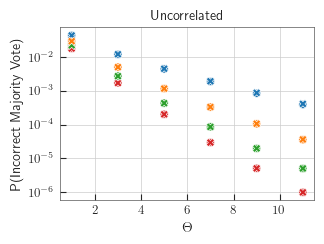

In [39]:
df_updated = df.sort_values('Exp')
nbar_l = set(df_updated.nbar)
palette = sns.color_palette()[: len(nbar_l)]
df_to_plot = df_updated
df_to_plot = df_updated[
    (
        df_updated['Exp'].isin(
            [
                'PhaseFlipsCorrelationTransitionMatricesNoIdle',
                'PhaseFlipsCorrelationSFBNoIdle',
            ]
        )
    )
]

s=35
s2=20
# fig = plot_setup(aspect_ratio=1/1.7, width_ratio=1.2)
g = sns.relplot(
    data=df_to_plot[df_to_plot['correlated'] == 0],
    # data=df_to_plot,
    x='k2a',
    y='maj_vote',
    col='name',
    # hue='nbar',
    kind='scatter',
    hue='$|\\alpha|^2$',
    palette=palette,
    height=2.3,
    # aspect=1.2,
    aspect=0.88,
    s=s,
    # markers=['o', 'P'],
    # dashes=[(2, 0), (3, 0)], # (segment, gap)
    # dashes=[':', '--'],
    # style='Exp',
    style='Correlation Model',
    # marker='o',
    # markersize=5,
    # legend=False
).set(yscale='log')
g._legend.remove()


for i, ax in enumerate(g.fig.axes):
    ax.grid()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
# g._legend.set_title("$\\overline{n}$")
g.fig.axes[0].set_ylim(5.809463983847523e-07, 0.07360850155637702)
g.set_titles(
    # row_template = '{row_name}',
    # col_template='$p_{{target}} = {new_col_name[col_name]}$'
    col_template='{col_name}'
)
# plt.subplots_adjust(wspace=None)
plt.tight_layout(pad=0.2)
# g.fig.axes[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,frameon=False)
g.set_xlabels('$\\Theta$', clear_inner=False)
g.set_ylabels('P(Incorrect Majority Vote)', clear_inner=False)
plt.savefig('uncorrelations_maj_vote.pdf')


In [58]:
from qsim.utils.quantum_guidelines import global_setup, plot_setup
global_setup()
%matplotlib inline

In [ ]:
fig = plot_setup()
ax1 = fig.add_subplot(1, 2, 1)

for nbar in set(df.nbar):
    df[df[]].groupby("Method").plot(x="k2a", y="maj_vote", marker="o", ax=ax1)
ax1.legend(["False","True"])


In [ ]:
df_to_plot

,exp,exp_name,k2a,nbar,correlated,maj_vote,name,N_data,N_ancilla
0,<experiments.repeated_cnots.correlations.Phase...,PhaseFlipsCorrelationFockQutipNoIdle,1,4,0,0.059136,Uncorrelated,18,18
1,<experiments.repeated_cnots.correlations.Phase...,PhaseFlipsCorrelationFockQutipNoIdle,1,4,1,0.059136,Correlated,18,18
2,<experiments.repeated_cnots.correlations.Phase...,PhaseFlipsCorrelationFockQutipNoIdle,3,4,0,0.029523,Uncorrelated,18,18
3,<experiments.repeated_cnots.correlations.Phase...,PhaseFlipsCorrelationFockQutipNoIdle,3,4,1,0.012638,Correlated,18,18
4,<experiments.repeated_cnots.correlations.Phase...,PhaseFlipsCorrelationFockQutipNoIdle,5,4,0,0.009200,Uncorrelated,18,18
...,...,...,...,...,...,...,...,...,...
187,<experiments.repeated_cnots.correlations.Phase...,PhaseFlipsCorrelationReducedReducedModelNoIdle,7,10,1,0.000075,Correlated,5,4
188,<experiments.repeated_cnots.correlations.Phase...,PhaseFlipsCorrelationReducedReducedModelNoIdle,9,10,0,0.000000,Uncorrelated,5,4
189,<experiments.repeated_cnots.correlations.Phase...,PhaseFlipsCorrelationReducedReducedModelNoIdle,9,10,1,0.000000,Correlated,5,4
190,<experiments.repeated_cnots.correlations.Phase...,PhaseFlipsCorrelationReducedReducedModelNoIdle,11,10,0,0.000000,Uncorrelated,5,4


In [ ]:
df_updated

,Exp,k2a,nbar,N_data,N_ancilla,correlated,maj_vote,name
0,PhaseFlipsCorrelationSFBNoIdle,1,4,5,4,1,0.04315,Correlated
1,PhaseFlipsCorrelationSFBNoIdle,1,4,5,4,0,0.04315,Uncorrelated
2,PhaseFlipsCorrelationSFBNoIdle,3,4,5,4,1,0.0225,Correlated
3,PhaseFlipsCorrelationSFBNoIdle,3,4,5,4,0,0.011817,Uncorrelated
4,PhaseFlipsCorrelationSFBNoIdle,5,4,5,4,1,0.012293,Correlated
...,...,...,...,...,...,...,...,...
85,PhaseFlipsCorrelationTransitionMatricesNoIdle,7,10,3,3,0,0.000029,Uncorrelated
86,PhaseFlipsCorrelationTransitionMatricesNoIdle,9,10,3,3,1,0.000065,Correlated
87,PhaseFlipsCorrelationTransitionMatricesNoIdle,9,10,3,3,0,0.000005,Uncorrelated
88,PhaseFlipsCorrelationTransitionMatricesNoIdle,11,10,3,3,1,0.000027,Correlated


In [ ]:
exp = corrSFBnI

for nbar in [6, 8, 10]:
    for k2a in [11]:
        exp.reinit(k2a=k2a, nbar=nbar)
        # if type(exp).__name__ == "PhaseFlipsCorrelationFockQutipNoIdle":
        #     exp.reinit(k2a=k2a, nbar=nbar, N=18, N_ancilla=18)
        # elif type(exp).__name__ == "PhaseFlipsCorrelationTransitionMatricesNoIdle":
        #     exp.reinit(k2a=k2a, nbar=nbar, N=7, N_ancilla=7)
        # else:
        #     exp.reinit(k2a=k2a, nbar=nbar, N=5, N_ancilla=4)
        try:
            exp.get_data()
            maj_vote_corr = get_majority_vote_correlated(
                data=exp.data, index=k2a
            )
            maj_vote_uncorr = get_majority_vote_uncorrelated(
                data=exp.data, index=k2a
            )
            res.append(
                {
                    'Exp': type(exp).__name__,
                    'k2a': k2a,
                    'nbar': nbar,
                    'Majority vote Correlated': maj_vote_corr,
                    'Majority vote Uncorrelated': maj_vote_uncorr,
                    'N_data': exp.N,
                    'N_ancilla': exp.N_ancilla,
                }
            )
        except:
            pass

# pZ ancilla

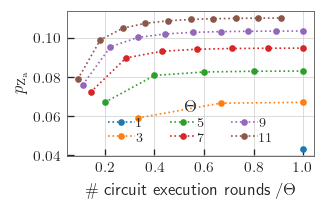

In [119]:

exp = corrSFBnI
k2a_l = range(1, 12, 2)
props = global_setup(columns="twocolumn", paper="a4paper", fontsize=11)
%matplotlib inline
# fig = plot_setup(1/1.7, width_ratio=0.8)
width = 3.5/3.22
fig = plot_setup(1/1.6, 0.8)

ax = fig.add_subplot()

exp = corrSFBnI

exp.reinit(k2a=k2a, nbar=4, N=5, N_ancilla=4, k2a_l=range(1, 12, 2))
ax = exp.plot_phase_flip(ax=None if ax is None else ax, label_bool=False)
# ax.get_legend().remove()
ax.set_prop_cycle(None)
ax.set_yscale("linear")
for k2a in k2a_l:
    ax.plot(
        [], [], "o:", label=f"${k2a}$"
    )

ax.set_ylabel("$p_{\mathrm{Z_\mathrm{a}}}$")
ax.set_xlabel("$\#$ circuit execution rounds $/ \Theta$")
# ax1.set_ylim(0.04, 0.14)
# ax2.set_ylim(0.04, 0.14)
ax.legend(
    title='$\Theta$',
    handletextpad=0.08,
    labelspacing=0.2,
    fancybox=True, framealpha=0.,
    bbox_to_anchor=(0.5, 0),
    loc="lower center",
    ncol=3
)
ax.grid(which='major', alpha=0.8)
# ax2.get_legend().remove()
plt.tight_layout(pad=0.2)
# generate_ax_params(ax)
plt.savefig(f"control_PhaseFlips.pdf")

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')